<a href="https://colab.research.google.com/github/yodhasu/Code-Archive/blob/machine-learning/Arimatest_on_air_polution_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2839]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

data source: https://www.kaggle.com/datasets/jedijamarimanullang/jakarta-daily-air-quality

In [2840]:
df = pd.read_csv('jakarta-central (us consulate) indonesia-air-quality.csv', parse_dates=True)

df

,date,pm25,pm10
0,2020/12/1,37,31
1,2020/12/2,59,31
2,2020/12/3,60,31
3,2020/12/4,59,26
4,2020/12/5,43,29
...,...,...,...
1828,2015/9/15,,104
1829,2015/9/16,,81
1830,2015/9/17,,93
1831,2015/9/18,,86


In [2841]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833 entries, 0 to 1832
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1833 non-null   object
 1    pm25   1833 non-null   object
 2    pm10   1833 non-null   object
dtypes: object(3)
memory usage: 43.1+ KB


In [2842]:
from sklearn import preprocessing

df['date'] = pd.to_datetime(df['date'])

In [2843]:
df[' pm25'] = df[' pm25'].str.strip()
df[' pm10'] = df[' pm10'].str.strip()

In [2844]:
df[' pm25'] = pd.to_numeric(df[' pm25'])
df[' pm10'] = pd.to_numeric(df[' pm10'])

In [2845]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833 entries, 0 to 1832
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1833 non-null   datetime64[ns]
 1    pm25   1703 non-null   float64       
 2    pm10   1002 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 43.1 KB


,date,pm25,pm10
count,1833,1703.000000,1002.000000
mean,2018-05-13 21:45:39.770867456,97.788608,52.469062
min,2015-07-16 00:00:00,7.000000,1.000000
25%,2017-01-22 00:00:00,76.000000,40.000000
50%,2018-05-26 00:00:00,101.000000,55.000000
75%,2019-09-03 00:00:00,121.000000,64.000000
max,2020-12-07 00:00:00,209.000000,209.000000
std,NaN,30.111504,19.047172


<Axes: >

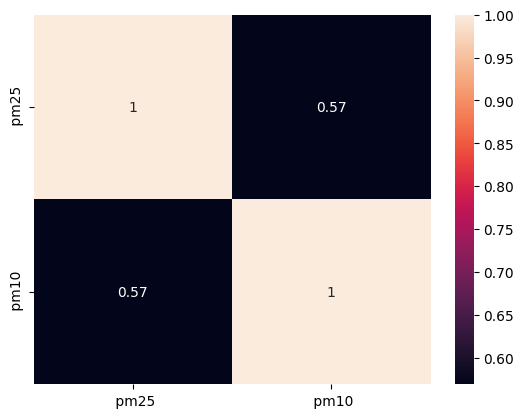

In [2846]:
from sklearn import metrics

corrmat = df.corr(numeric_only= True)

sb.heatmap(corrmat, annot = True)

<Axes: ylabel=' pm25'>

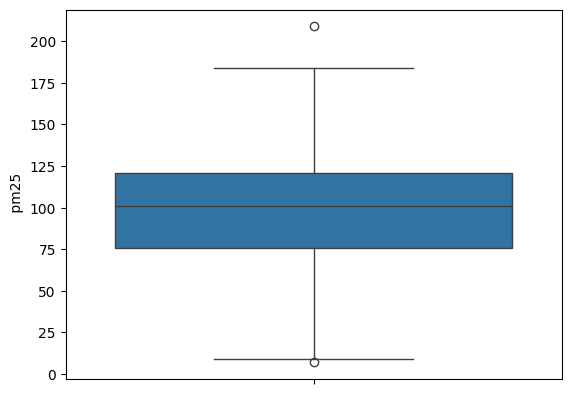

In [2847]:
sb.boxplot(df[' pm25'])

<Axes: ylabel=' pm10'>

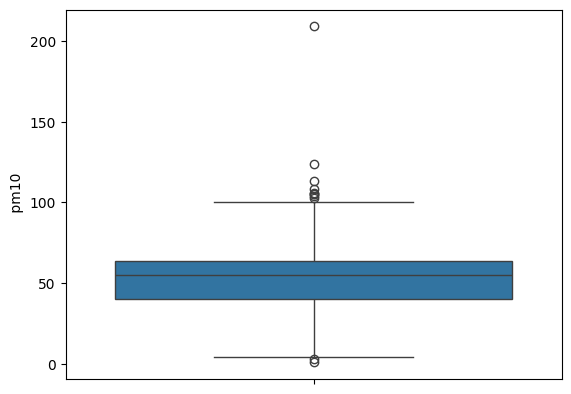

In [2848]:
sb.boxplot(df[' pm10'])

In [2849]:
dfdrop = df.drop(columns=[' pm10'], axis = 1)

dfdrop.info()

dfdrop.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833 entries, 0 to 1832
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1833 non-null   datetime64[ns]
 1    pm25   1703 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.8 KB


,date,pm25
count,1833,1703.000000
mean,2018-05-13 21:45:39.770867456,97.788608
min,2015-07-16 00:00:00,7.000000
25%,2017-01-22 00:00:00,76.000000
50%,2018-05-26 00:00:00,101.000000
75%,2019-09-03 00:00:00,121.000000
max,2020-12-07 00:00:00,209.000000
std,NaN,30.111504


In [2850]:
import numpy as np
import random as rd

# dfnoout = dfdrop[' pm25'].apply(lambda l: l if not np.isnan(l) else np.random.choice([76, 121]))
# dfnoout = dfdrop[' pm25'].apply(lambda n: rd.randint(101, 121) or rd.randint(76, 100))
dfnoout = dfdrop.dropna()

In [2851]:
# dfnoout = dfnoout.to_frame()

dfnoout.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1703 entries, 0 to 1702
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1703 non-null   datetime64[ns]
 1    pm25   1703 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.9 KB


In [2852]:
dfnoout

,date,pm25
0,2020-12-01,37.0
1,2020-12-02,59.0
2,2020-12-03,60.0
3,2020-12-04,59.0
4,2020-12-05,43.0
...,...,...
1698,2015-12-27,94.0
1699,2015-12-28,91.0
1700,2015-12-29,98.0
1701,2015-12-30,64.0


In [2853]:
dfnooutdate = dfnoout.set_index(dfnoout['date']).drop(columns=['date'], axis = 1)

In [2854]:
dfnooutdate = dfnooutdate.sort_index()
dfnooutdate = dfnooutdate.resample('1W', label='right').mean()

In [2855]:
dfnooutdate

,pm25
date,
2015-12-27,71.333333
2016-01-03,79.500000
2016-01-10,102.000000
2016-01-17,106.000000
2016-01-24,85.714286
...,...
2020-11-15,108.142857
2020-11-22,103.857143
2020-11-29,79.142857


In [2856]:
dfnooutdate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2015-12-27 to 2020-12-13
Freq: W-SUN
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0    pm25   253 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [2857]:
dfnooutdate.isna().value_counts()

 pm25
False    253
True       7
Name: count, dtype: int64

In [2858]:
dfnooutdate = dfnooutdate.dropna()
dfnooutdate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-12-27 to 2020-12-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0    pm25   253 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


<Axes: >

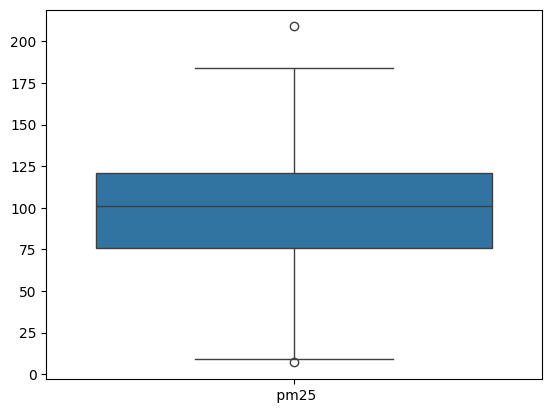

In [2859]:
sb.boxplot(dfnoout)

In [2860]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(dfnooutdate[' pm25'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -3.1707506741840277
n_lags: 0.021741408293524406
p-value: 0.021741408293524406
Critial Values:
   1%, -3.4568881317725864
Critial Values:
   5%, -2.8732185133016057
Critial Values:
   10%, -2.5729936189738876


data is stationery

In [2861]:
import numpy as np

msk = (dfnoout.index < len(dfnoout)-20)

df_train = dfnoout[msk].copy()
df_test = dfnoout[~msk].copy()

# dftrain = dfnoout.iloc[:-30]
# dftest = dfnoout.iloc[-30]

# dftrain = dfnooutdate.sample(frac = 0.7)
# dftest = dfnooutdate.drop(dftrain.index)

dfTrain, dfTest= np.split(dfnooutdate, [int(0.8*len(dfnooutdate))])

In [2862]:
dfTrain = dfTrain.sort_index()
dfTest = dfTest.sort_index()

print(dfTrain.tail())
print(dfTest.tail())

print(dfTrain.info())
print(dfTest.info())

                  pm25
date                  
2019-10-27  121.571429
2019-11-03  105.285714
2019-11-10  120.714286
2019-11-17  113.142857
2019-11-24  109.285714
                  pm25
date                  
2020-11-15  108.142857
2020-11-22  103.857143
2020-11-29   79.142857
2020-12-06   50.285714
2020-12-13   48.000000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 202 entries, 2015-12-27 to 2019-11-24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0    pm25   202 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51 entries, 2019-12-01 to 2020-12-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0    pm25   51 non-null     float64
dtypes: float64(1)
memory usage: 816.0 bytes
None


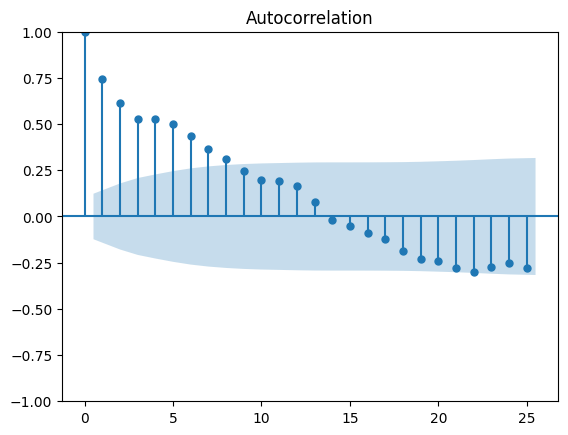

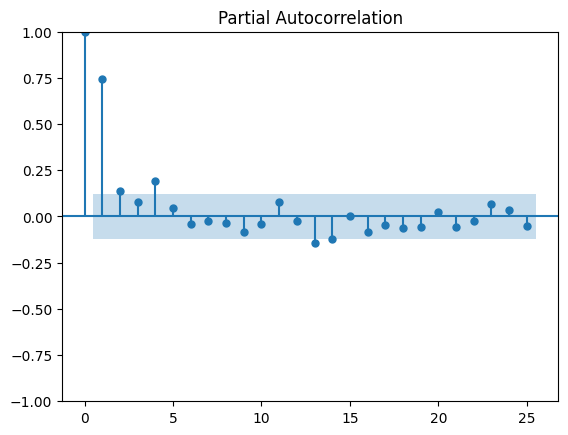

In [2863]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf = plot_acf(dfnooutdate[' pm25'])

pacf = plot_pacf(dfnooutdate[' pm25'])

In [2864]:
!pip install pmdarima

In [2865]:
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA as arima

automodel = pm.auto_arima(dfnooutdate[' pm25'], trace=True, suppress_warnings=True, start_p=0, start_q=0, max_order=4, test = 'adf', seasonal=True)
automodel

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2154.625, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2139.928, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2131.114, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2152.633, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2125.962, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2127.692, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2127.819, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2126.784, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2136.635, Time=0.19 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2129.668, Time=0.59 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2123.978, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2129.135, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2137.942, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2125.709, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]          

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [2866]:
print(automodel.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  253
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1058.989
Date:                Mon, 13 May 2024   AIC                           2123.978
Time:                        22:26:13   BIC                           2134.566
Sample:                             0   HQIC                          2128.238
                                - 253                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3395      0.132      2.566      0.010       0.080       0.599
ma.L1         -0.6925      0.107     -6.461      0.000      -0.903      -0.482
sigma2       261.3406     18.637     14.022      0.0

In [2867]:
from pandas import DataFrame as df

model = arima(dfTrain[' pm25'], order=(1, 1, 1))
autofit = model.fit()

residu = df(autofit.resid)
residu.describe()

,0
count,202.000000
mean,0.772116
std,16.677943
min,-57.419077
25%,-8.012189
50%,0.533983
75%,10.679732
max,71.333333


# Junk

In [2868]:
# dftrain.info()
# dftest.info()

In [2869]:
# truemodel = arima(dftrain[' pm25'], order=(2,1,2))
# fittedtrue = truemodel.fit()
# fittedtrue.summary()

In [2870]:
# # fit_test = fitted.forecast(len(dftest))

# # dfnoout['forecast'] = [None]*len(dftrain) + list(fit_test)

# # dfnoout

# start = len(dftrain)
# end = len(dftest) + start -1

# predict = fittedtrue.predict(start = start, end = end, typ= 'levels')

In [2871]:
# predict.info()

In [2872]:
# predict.index = dftest.index
# predict = predict.sort_index()
# predict

In [2873]:
# dftest.tail()

In [2874]:
# predict.plot(legend=True)
# dftest[' pm25'].plot(legend=True)

In [2875]:
# dftest[' pm25'].mean()

In [2876]:
# from sklearn.metrics import mean_squared_error
# from math import sqrt

# modelmse = mean_squared_error(predict, dftest[' pm25'])
# sqrtmodelmse = sqrt(mean_squared_error(predict, dftest[' pm25']))

# print(modelmse)
# print(sqrtmodelmse)

In [2877]:
# residuals = pd.DataFrame(fittedtrue.resid)
# fig, ax = plt.subplots(1,2)
# residuals.plot(title="Residuals", ax=ax[0])
# residuals.plot(kind='kde', title='Density', ax=ax[1])
# plt.show()

In [2878]:
# auto = pm.auto_arima(dftrain[' pm25'], seasonal= False, stepwise= False)
# auto

In [2879]:
# auto.summary()

In [2880]:
# autofit_test = auto.predict(n_periods=len(dftest))

# dfnoout['forecast auto'] = [None]*len(dftrain) + list(autofit_test)

# # dfnoout

# New training auto

In [2881]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51 entries, 2019-12-01 to 2020-12-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0    pm25   51 non-null     float64
dtypes: float64(1)
memory usage: 816.0 bytes


In [2882]:
trainfit = automodel.fit(dfTrain[' pm25'])

In [2883]:
forec = trainfit.predict(n_periods=len(dfTest), return_conf_int=False)

In [2884]:
forec.index = dfTest.index
forec = forec.sort_index()
forec

date
2019-12-01    111.653993
2019-12-08    112.431482
2019-12-15    112.686726
2019-12-22    112.770521
2019-12-29    112.798030
2020-01-05    112.807061
2020-01-12    112.810026
2020-01-19    112.810999
2020-01-26    112.811319
2020-02-02    112.811424
2020-02-09    112.811458
2020-02-16    112.811469
2020-02-23    112.811473
2020-03-01    112.811474
2020-03-08    112.811475
2020-03-15    112.811475
2020-03-22    112.811475
2020-03-29    112.811475
2020-04-05    112.811475
2020-04-12    112.811475
2020-04-19    112.811475
2020-04-26    112.811475
2020-05-03    112.811475
2020-05-10    112.811475
2020-05-17    112.811475
2020-05-24    112.811475
2020-05-31    112.811475
2020-06-07    112.811475
2020-06-14    112.811475
2020-06-21    112.811475
2020-06-28    112.811475
2020-07-05    112.811475
2020-07-12    112.811475
2020-07-19    112.811475
2020-07-26    112.811475
2020-08-02    112.811475
2020-08-09    112.811475
2020-08-16    112.811475
2020-08-23    112.811475
2020-08-30    112.81

In [2885]:
# forecdf = pd.DataFrame(forec[0],index = dfTest.index,columns=['Prediction'])

In [2886]:
# forecdf

In [2887]:
# forecdf.isnull().value_counts()

In [2888]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

mse = mean_squared_error(dfTest[' pm25'], forec)
mae = mean_absolute_error(dfTest[' pm25'], forec)
sqrtmse = sqrt(mse)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", sqrtmse)

Mean Squared Error:  781.914726343738
Mean Absolute Error:  21.745258179703818
Root Mean Squared Error:  27.96273817679052


<Axes: xlabel='date'>

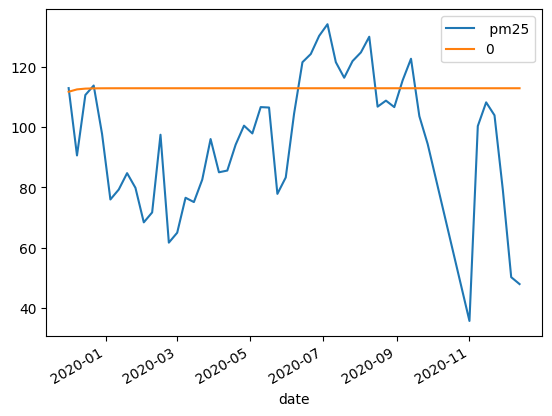

In [2889]:
pd.concat([dfTest[' pm25'],forec],axis=1).plot()

# New Training ARIMA statsmodel

## Rolling forecast

In [2890]:
X = dfnooutdate.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]

In [2891]:
history = [x for x in train]
predictions = list()

In [2892]:
history

[array([71.33333333]),
 array([79.5]),
 array([102.]),
 array([106.]),
 array([85.71428571]),
 array([62.42857143]),
 array([63.57142857]),
 array([62.71428571]),
 array([95.]),
 array([79.57142857]),
 array([75.57142857]),
 array([99.14285714]),
 array([94.85714286]),
 array([95.57142857]),
 array([95.57142857]),
 array([99.85714286]),
 array([106.14285714]),
 array([94.]),
 array([106.]),
 array([115.]),
 array([114.14285714]),
 array([131.85714286]),
 array([132.]),
 array([141.28571429]),
 array([130.85714286]),
 array([127.71428571]),
 array([135.28571429]),
 array([126.28571429]),
 array([120.71428571]),
 array([123.85714286]),
 array([118.85714286]),
 array([123.42857143]),
 array([126.42857143]),
 array([110.71428571]),
 array([113.57142857]),
 array([108.]),
 array([128.71428571]),
 array([115.71428571]),
 array([107.57142857]),
 array([94.71428571]),
 array([90.42857143]),
 array([108.28571429]),
 array([110.71428571]),
 array([132.]),
 array([116.71428571]),
 array([130.8571

In [2893]:
dfTest.iloc[10]

 pm25    71.714286
Name: 2020-02-09 00:00:00, dtype: float64

In [2894]:
history_df = df(history)

In [2895]:
history_df

,0
0,71.333333
1,79.500000
2,102.000000
3,106.000000
4,85.714286
...,...
197,121.571429
198,105.285714
199,120.714286
200,113.142857


In [2896]:
for t in range(len(test)):
 model = arima(history, order=(1, 1, 1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

predicted=111.653993, expected=112.857143
predicted=113.198553, expected=90.571429
predicted=98.887969, expected=110.571429
predicted=109.005568, expected=113.714286
predicted=111.499244, expected=97.714286
predicted=102.078193, expected=76.000000
predicted=86.846674, expected=79.285714
predicted=85.459789, expected=84.714286
predicted=86.986262, expected=79.857143
predicted=83.099216, expected=68.428571
predicted=74.636098, expected=71.714286
predicted=74.691612, expected=97.428571
predicted=90.368371, expected=61.714286
predicted=69.956956, expected=65.000000
predicted=69.248488, expected=76.571429
predicted=75.141854, expected=75.142857
predicted=74.717112, expected=82.571429
predicted=79.541244, expected=96.000000
predicted=89.043061, expected=85.000000
predicted=84.360663, expected=85.571429
predicted=84.932255, expected=94.142857
predicted=90.558367, expected=100.428571
predicted=95.731401, expected=97.857143
predicted=95.665442, expected=106.571429
predicted=101.943576, expected

In [2897]:
prediction_df = df(predictions)

In [2898]:
prediction_df.index = dfTest.index
prediction_df

,0
date,
2019-12-01,111.653993
2019-12-08,113.198553
2019-12-15,98.887969
2019-12-22,109.005568
2019-12-29,111.499244
2020-01-05,102.078193
2020-01-12,86.846674
2020-01-19,85.459789
2020-01-26,86.986262


## predict function

In [2991]:
model = arima(history, order=(1, 1, 1))
model_fit = model.fit()

newforc = model_fit.predict(start = len(train), end = len(train) + len(test) - 1, typ='levels')

In [2992]:
newforc_df = df(newforc)

In [2993]:
newforc_df.index = dfTest.index

In [2994]:
newforc_df

,0
date,
2019-12-01,111.592529
2019-12-08,113.194014
2019-12-15,98.670174
2019-12-22,109.120678
2019-12-29,111.600473
2020-01-05,101.897577
2020-01-12,86.560537
2020-01-19,85.438751
2020-01-26,87.059033


<Axes: xlabel='date'>

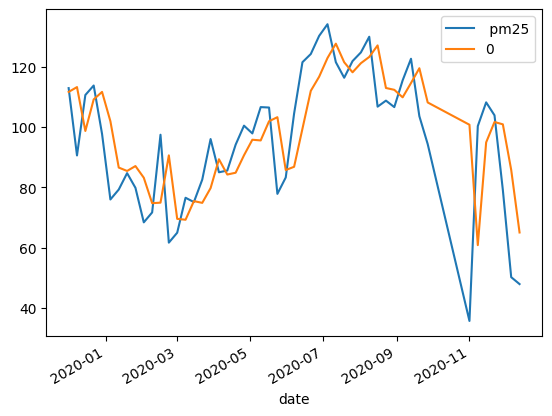

In [2995]:
pd.concat([dfTest[' pm25'],newforc_df],axis=1).plot()

<Axes: xlabel='date'>

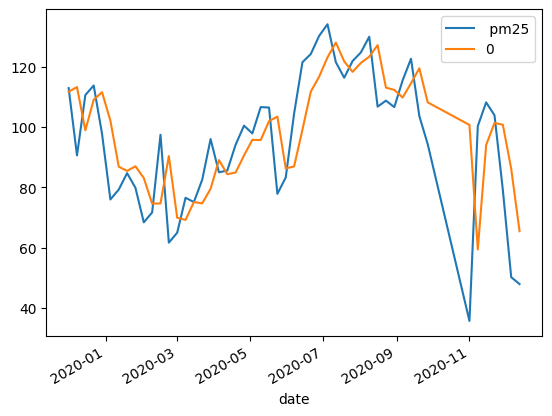

In [2996]:
pd.concat([dfTest[' pm25'],prediction_df],axis=1).plot()

# Predic future outcome

In [2997]:
dfnooutdate.tail()

,pm25
date,
2020-11-15,108.142857
2020-11-22,103.857143
2020-11-29,79.142857
2020-12-06,50.285714
2020-12-13,48.000000


In [3014]:
# forecast1=newfit.predict(n_periods=390, return_conf_int=False)
# forecast_range1=pd.date_range(start='2020-12-07', periods=100, freq= 'D')
# forecast1_df = pd.DataFrame(forecast1[0],index =forecast_range1,columns=['Prediction'])
model1 = arima(history, order=(1, 1, 1))
model1_fit = model.fit()


newforc1 = model1_fit.predict(start = len(train), end = len(train) + len(test) - 1, typ='levels')
newforc1_df = df(newforc1)
newforc1_df = newforc1_df.rename(columns={'0':' pm25'})

In [3015]:
newforc1

array([111.59252898, 113.19401359,  98.67017395, 109.12067828,
       111.60047326, 101.89757667,  86.56053703,  85.43875075,
        87.05903312,  83.19504429,  74.77349427,  74.94820162,
        90.59235944,  69.58545301,  69.29077058,  75.45859344,
        74.87646686,  79.76513953,  89.31731828,  84.25486685,
        84.85377894,  90.62073375,  95.77119353,  95.53967621,
       101.89108513, 103.23806679,  85.73180976,  86.82261225,
        99.41559203, 111.95736405, 116.62650315, 122.82049619,
       127.56826632, 121.41182537, 118.08922866, 121.1026499 ,
       123.17202763, 126.99025666, 112.89709391, 112.28972219,
       109.8035512 , 114.54064572, 119.43559406, 108.10583018,
       100.73367546,  60.89058873,  94.90033685, 101.64064378,
       100.86724854,  85.79510485,  65.07687772])

In [3016]:
len(dfTest)

51

In [3017]:
dfTest.index[50]

Timestamp('2020-12-13 00:00:00')

In [3018]:
# forecast1
forecast_range1=pd.date_range(start=dfTest.index[50], periods=51, freq= 'D')
# forecast_range1
newforc1_df.index = forecast_range1
newforc1_df

,0
2020-12-13,111.592529
2020-12-14,113.194014
2020-12-15,98.670174
2020-12-16,109.120678
2020-12-17,111.600473
2020-12-18,101.897577
2020-12-19,86.560537
2020-12-20,85.438751
2020-12-21,87.059033
2020-12-22,83.195044


<Axes: >

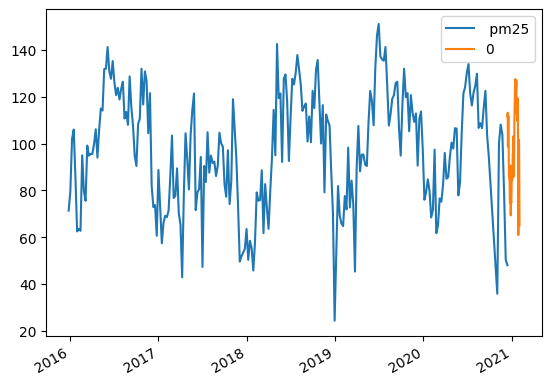

In [3019]:
pd.concat([dfnooutdate[' pm25'], newforc1_df],axis=1).plot()

Big fucking mistakes: never drop important data and never fill na